# Generator learning

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tqdm
tqdm.monitor_interval = 0

from torchtext.data import Field
from awd_lstm import GeneratorModelData

import torch
import dill as pickle
import seaborn as sns
from matplotlib import pyplot as plt
from IPython import display as dp
from functools import partial
from torch import optim

sns.set_style('whitegrid')
sns.despine()
dp.set_matplotlib_formats('retina')

%matplotlib inline

## Define model

In [2]:
FIELD = Field(sequential=False, use_vocab=False, tensor_type=torch.FloatTensor)

In [3]:
PATH = '/Users/nickstulov/Desktop/Work/GenLearn/'
TRN_PATH = f'{PATH}data_sparse/'
VAL_PATH = f'{PATH}data_sparse_val/'
TST_PATH = f'{PATH}data_sparse_test/'

In [4]:
md = GeneratorModelData.from_csv_files(PATH, FIELD, TRN_PATH, VAL_PATH, TST_PATH, bptt=30)

In [5]:
em_sz = 2
nh = 100
nl = 3

In [6]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [7]:
learner = md.get_model(opt_fn, em_sz, nh, nl,
                       dropouti=0.05, dropout=0.05, wdrop=0.1, dropouth=0.05)

In [8]:
learner.clip=0.5

## Train

In [ ]:
learner.lr_find()

In [ ]:
learner.sched.plot(0, 0)
plt.gca().vlines(7e-4, 0.4, 1.0)

In [ ]:
learner.fit(1e-3, 10, wds=1e-6, cycle_len=1, cycle_mult=2)

In [ ]:
learner.lr_find()

In [ ]:
learner.sched.plot(0, 0)
plt.gca().vlines(1e-3, 0.4, 1.0)

In [ ]:
learner.clip = 0.3

In [ ]:
learner.fit(1e-3, 10, wds=1e-6, cycle_len=10)

## Save

In [ ]:
learner.save('model_awd.h5')

In [ ]:
learner.save_encoder('model_awd_encoder.h5')

## Load

In [8]:
learner.load('model_awd.h5')

In [9]:
learner.load('model_awd_with_rand.h5')

## Fine-tune for other generators

In [10]:
learner.freeze_to(-1)

In [11]:
learner.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                             
    0      0.75193    0.891213  



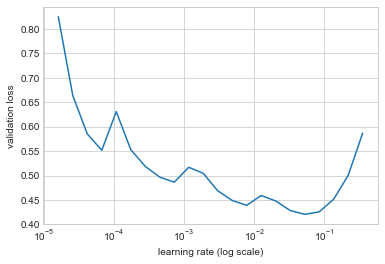

In [12]:
learner.sched.plot(1)

In [13]:
learner.clip = 0.5

In [19]:
learner.fit(5e-2, 5, cycle_len=5, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=155), HTML(value='')))

epoch      trn_loss   val_loss                             
    0      0.242526   0.045603  
    1      0.154187   0.010492                             
    2      0.123851   0.009724                             
    3      0.102202   0.006353                             
    4      0.09162    0.003936                              
    5      0.113336   0.038899                              
    6      0.115837   0.025101                             
    7      0.100943   0.009995                             
    8      0.08917    0.007106                              
    9      0.077584   0.004947                              
    10     0.074085   0.00349                               
    11     0.068384   0.00305                               
    12     0.068173   0.002857                              
    13     0.067337   0.002334                              
    14     0.065159   0.002847                              
    15     0.132658   0.053357                            

[array([0.00203])]

In [20]:
learner.unfreeze()

In [25]:
learner.lr_find(1e-6, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|████████▉ | 26/29 [00:02<00:00, 10.04it/s, loss=0.171] 


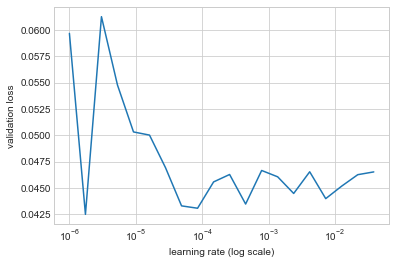

In [26]:
learner.sched.plot(0)

In [27]:
learner.clip = 10.

In [28]:
learner.fit(5e-5, 10, cycle_len=10, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=10230), HTML(value='')))

epoch      trn_loss   val_loss                              
    0      0.057369   0.001899  
    1      0.058321   0.001905                              
    2      0.060019   0.001966                              
    3      0.060909   0.002051                              
    4      0.057736   0.002051                              
    5      0.054955   0.002048                              
    6      0.054991   0.002062                              
    7      0.0516     0.002068                              
    8      0.05264    0.001935                              
    9      0.049454   0.001966                              
    10     0.046372   0.002112                              
    11     0.051113   0.001764                              
    12     0.056003   0.001855                              
    13     0.053849   0.001873                              
    14     0.050908   0.002                                 
    15     0.049997   0.001971                      

   267     0.053818   0.002026                              
   268     0.053245   0.001999                              
   269     0.051511   0.001739                              
   270     0.054576   0.001999                              
   271     0.055415   0.001953                              
   272     0.055974   0.001964                              
   273     0.056651   0.001921                              
   274     0.058601   0.002019                              
   275     0.055683   0.002012                              
   276     0.054078   0.001821                              
   277     0.051687   0.002046                              
   278     0.04719    0.001996                              
   279     0.04796    0.002058                              
   280     0.051374   0.002013                              
   281     0.049966   0.001943                              
   282     0.052058   0.002017                              
   283     0.050491   0.

   535     0.052325   0.002019                              
   536     0.0551     0.001739                              
   537     0.057735   0.001976                              
   538     0.05761    0.001979                              
   539     0.055996   0.001988                              
   540     0.056736   0.00195                               
   541     0.054001   0.001803                              
   542     0.051445   0.001912                              
   543     0.048949   0.002066                              
   544     0.049003   0.002033                              
   545     0.050006   0.002074                              
   546     0.049099   0.002068                              
   547     0.050486   0.001856                              
   548     0.047541   0.00207                               
   549     0.050043   0.001935                              
   550     0.053697   0.001859                              
   551     0.056048   0.

   803     0.054041   0.002008                              
   804     0.052248   0.001991                              
   805     0.051275   0.001998                              
   806     0.051687   0.002034                              
   807     0.055552   0.001887                              
   808     0.055864   0.001995                              
   809     0.05634    0.001925                              
   810     0.054803   0.002056                              
   811     0.054218   0.001781                              
   812     0.053776   0.001948                              
   813     0.05227    0.001855                              
   814     0.056937   0.001852                              
   815     0.052338   0.002006                              
   816     0.052261   0.002001                              
   817     0.055263   0.001959                              
   818     0.051368   0.002022                              
   819     0.051715   0.

KeyboardInterrupt: 

In [29]:
learner.clip = 0.3

In [30]:
learner.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 24%|██▍       | 7/29 [00:00<00:02,  8.04it/s, loss=0.0716]

Exception in thread Thread-174:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/nickstulov/.virtualenvs/venv3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/nickstulov/.virtualenvs/venv3/bin/../lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 90%|████████▉ | 26/29 [00:04<00:00,  6.40it/s, loss=0.217] 


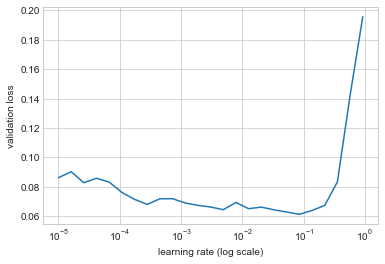

In [32]:
learner.sched.plot(0, 0)

In [33]:
learner.fit(5e-2, 4, cycle_len=10, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=150), HTML(value='')))

epoch      trn_loss   val_loss                              
    0      0.064291   0.006603  
    1      0.068403   0.00454                               
    2      0.059496   0.00405                               
    3      0.057829   0.004727                              
    4      0.059111   0.004074                              
    5      0.060368   0.002818                              
    6      0.057118   0.002146                              
    7      0.05723    0.001459                              
    8      0.060136   0.001999                              
    9      0.055632   0.0023                                
    10     0.071671   0.019481                              
    11     0.07348    0.007354                              
    12     0.06869    0.005756                              
    13     0.062084   0.003987                              
    14     0.060046   0.003709                              
    15     0.055744   0.003764                      

[array([0.00198])]

## Test

In [10]:
pred, true = learner.predict_with_targs(True)

RuntimeError: Cannot initialize CUDA without ATen_cuda library. PyTorch splits its backend into two shared libraries: a CPU library and a CUDA library; this error has occurred because you are trying to use some CUDA functionality, but the CUDA library has not been loaded by the dynamic linker for some reason.  The CUDA library MUST be loaded, EVEN IF you don't directly use any symbols from the CUDA library! One common culprit is a lack of -Wl,--no-as-needed in your link arguments; many dynamic linkers will delete dynamic library dependencies if you don't depend on any of their symbols.  You can check if this has occurred by using ldd on your binary to see if there is a dependency on *_cuda.so library.

In [11]:
with open('sc.pickle', 'rb') as f:
    sc = pickle.load(f)

In [11]:
pred = pred.reshape(true.shape)
pred = pred.transpose(1, 0, 2)
true = true.transpose(1, 0, 2)
true = np.concatenate(true, 0)
pred = np.concatenate(pred, 0)
stacked = sc.inverse_transform(np.concatenate([true, pred], -1))
pred_ = stacked[:, 2:]
stacked = sc.inverse_transform(np.concatenate([pred, true], -1))
true_ = stacked[:, 2:]

In [12]:
true_.shape

(24512, 2)

In [13]:
pred_.shape

(24512, 2)

In [14]:
# var_names = ['$V$', '$\\varphi$', '$P$', '$Q$']
var_names = ['$P$', '$Q$']

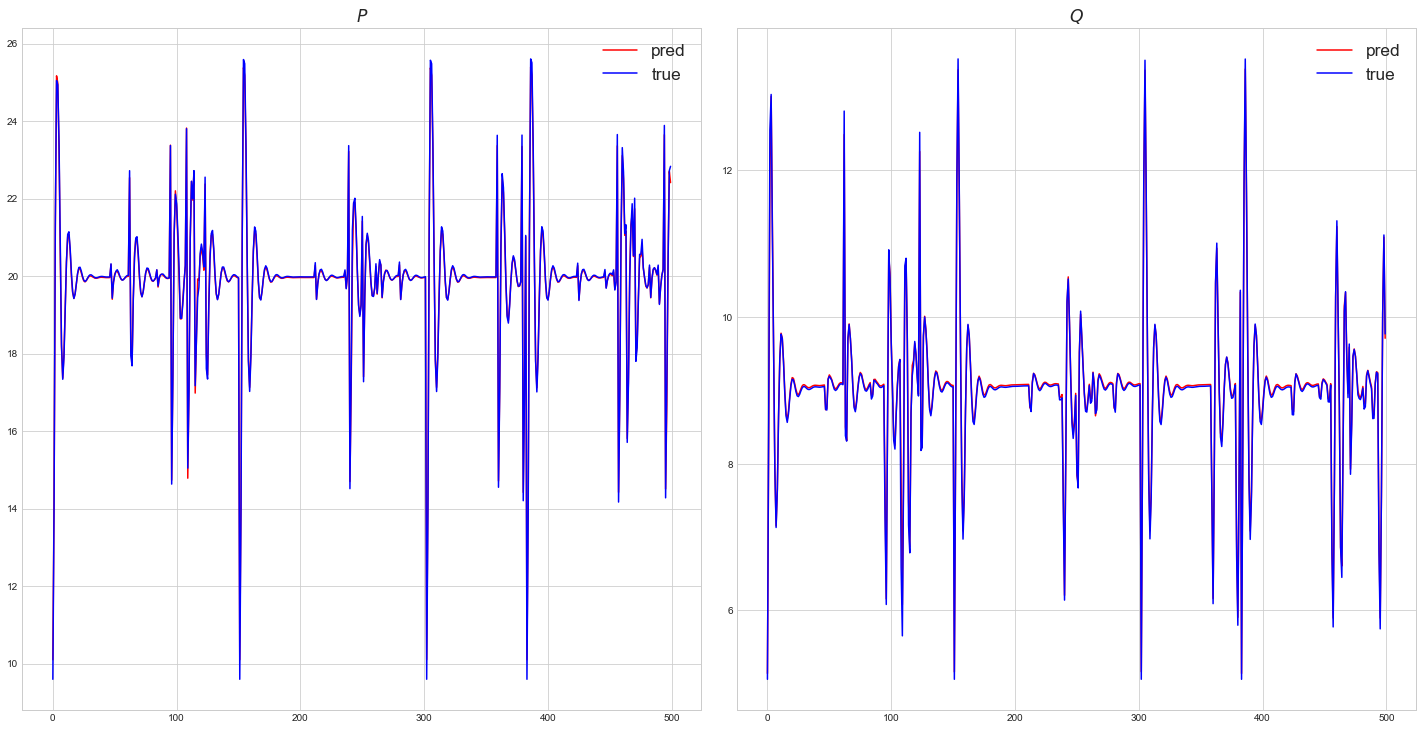

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(h_pad=4.0)
for i, (ax, name) in enumerate(zip(axes.flatten(), var_names)):
    ax.plot(pred_[:500, i], c='r', label='pred')
    ax.plot(true_[:500, i], c='b', label='true')
    ax.set_title(name, fontsize='xx-large')
    ax.legend(loc='best', fontsize='xx-large')

In [12]:
err = [np.sqrt(np.sum((t - p) ** 2)) / np.sqrt(np.sum(t ** 2)) \
       for t, p in zip(true_[:len(true_)//151*151].reshape((len(true_)//151, 151, 2)), 
                       pred_[:len(true_)//151*151].reshape((len(true_)//151, 151, 2)))]

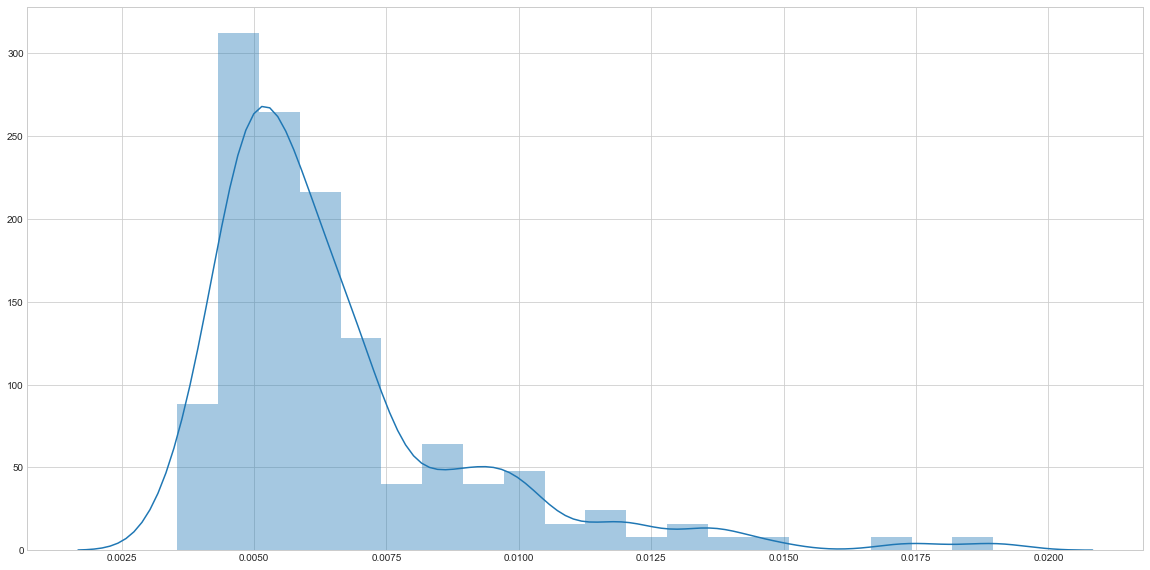

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(err)

In [14]:
print('\n'.join(['RMSE',
                 'mean %.4f' % np.mean(err).round(4),
                 'median %.4f' % np.median(err).round(4),
                 'max %.4f' % np.max(err).round(4),
                 'min %.4f' % np.min(err).round(4),
                 '95%% percentile %.4f' % np.percentile(err, 95).round(4)]))

RMSE
mean 0.0066
median 0.0058
max 0.0190
min 0.0036
95% percentile 0.0120


In [57]:
pred, true = learner.predict_with_targs(False)

In [58]:
pred = pred.reshape(true.shape)
pred = pred.transpose(1, 0, 2)
true = true.transpose(1, 0, 2)
true = np.concatenate(true, 0)
pred = np.concatenate(pred, 0)
stacked = sc.inverse_transform(np.concatenate([true, pred], -1))
pred_ = stacked[:, 2:]
stacked = sc.inverse_transform(np.concatenate([pred, true], -1))
true_ = stacked[:, 2:]

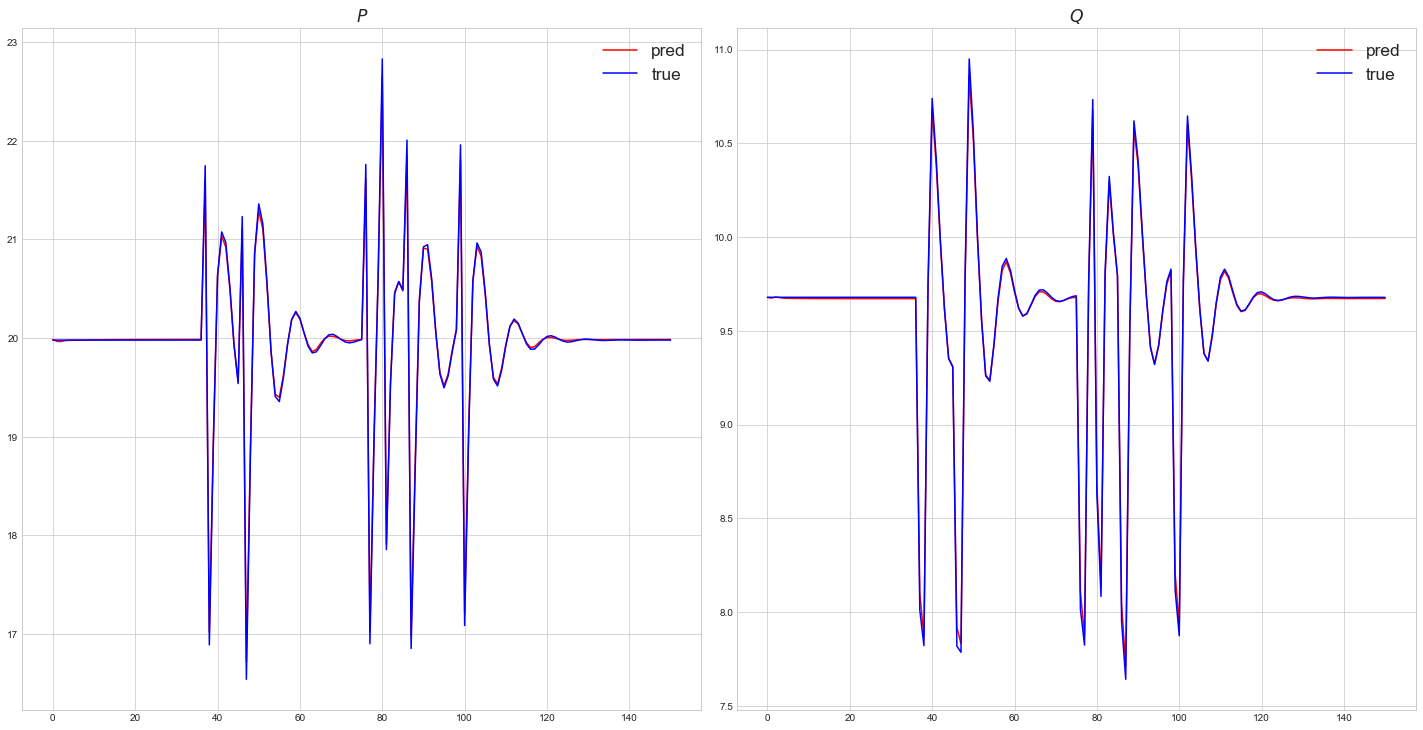

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(h_pad=4.0)
for i, (ax, name) in enumerate(zip(axes.flatten(), var_names)):
    ax.plot(pred_[:151, i], c='r', label='pred')
    ax.plot(true_[:151, i], c='b', label='true')
    ax.set_title(name, fontsize='xx-large')
    ax.legend(loc='best', fontsize='xx-large')

In [60]:
err = [np.sqrt(np.sum((t - p) ** 2)) / np.sqrt(np.sum(t ** 2)) \
       for t, p in zip(true_[:len(true_) // 151 * 151].reshape((len(true_) // 151, 151, 2)),
                       pred_[:len(true_) // 151 * 151].reshape((len(true_) // 151, 151, 2)))]

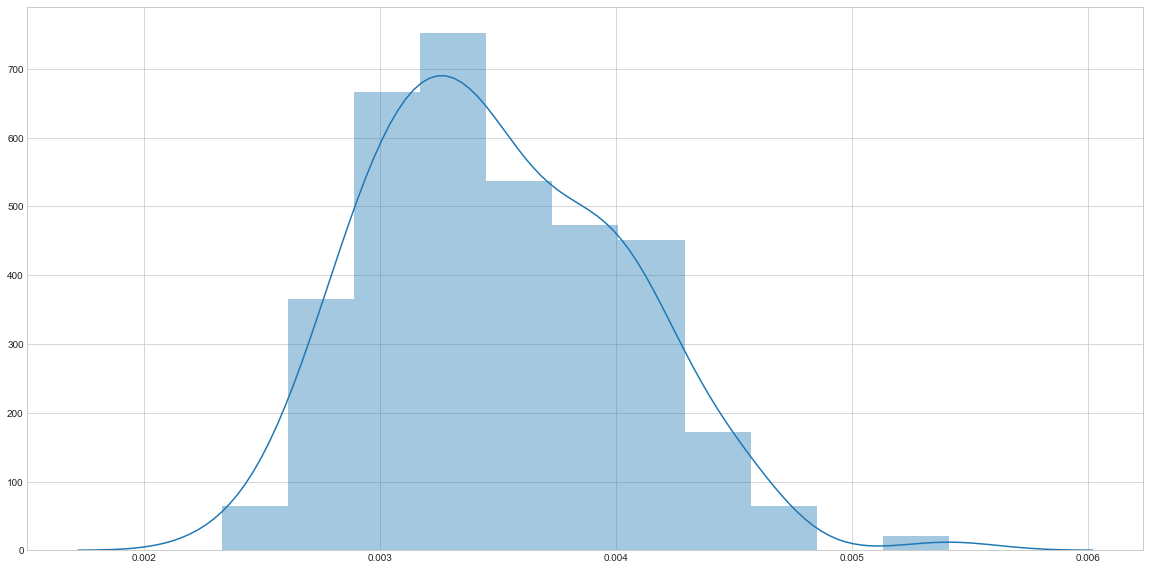

In [61]:
plt.figure(figsize=(20,10))
sns.distplot(err)

In [62]:
print('\n'.join(['RMSE',
                 'mean %.4f' % np.mean(err).round(4),
                 'median %.4f' % np.median(err).round(4),
                 'max %.4f' % np.max(err).round(4),
                 'min %.4f' % np.min(err).round(4),
                 '95%% percentile %.4f' % np.percentile(err, 95).round(4)]))

RMSE
mean 0.0035
median 0.0034
max 0.0054
min 0.0023
95% percentile 0.0044
